
# Multi-agent MPPI with shared predicted trajectories (moving obstacles)
This notebook runs four agents that share their previously computed optimal trajectories with nearby peers. Each agent treats received trajectories as moving obstacles when rolling out MPPI samples, so tightly clustered agents tend to wait/sequence through the pinch point.


In [1]:

import os, sys
sys.path.append(os.path.abspath('src'))
sys.path.append(os.path.abspath('app'))


simulating (moving peers):   0%|          | 0/20100 [00:00<?, ?it/s]

Device: cpu
Device: cpu
Device: cpu
Device: cpu
Saved GIF to video/multi_agent_moving.gif
Trajectory lengths [201, 201, 201, 201]


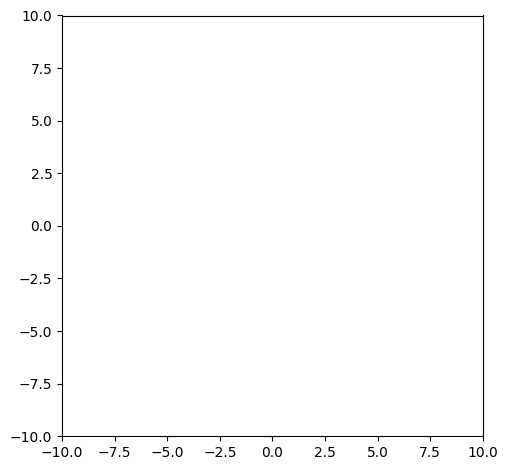

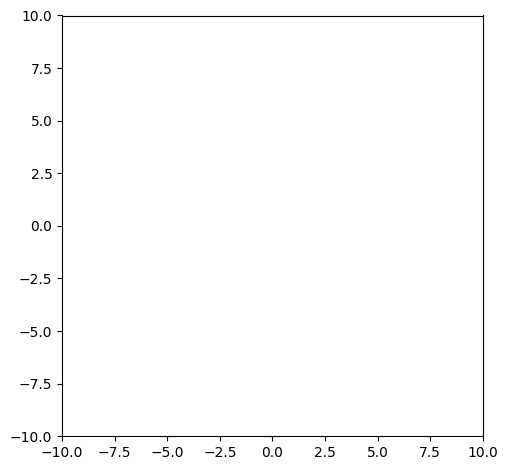

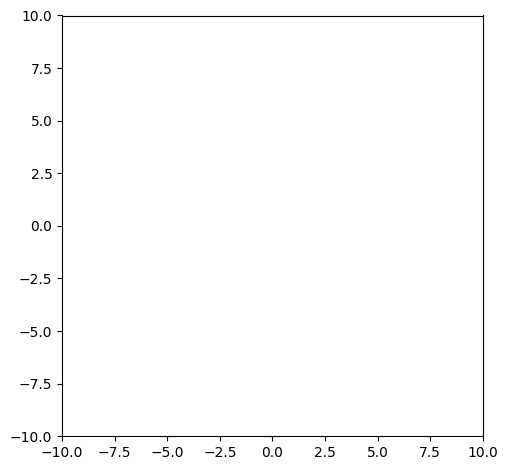

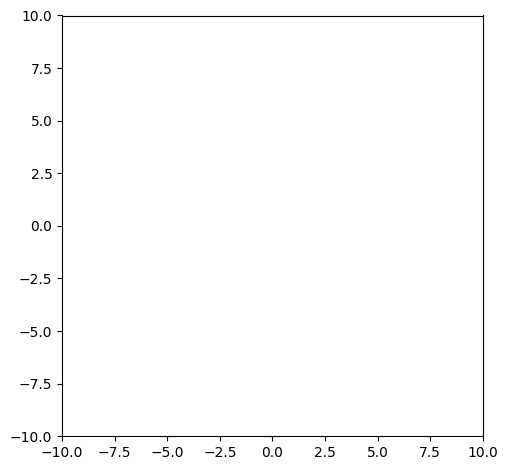

In [2]:

from tqdm.notebook import tqdm
from mppi_MAS_Naive.two_agent_navigation import run_multi_agent_navigation

gif_path = 'video/multi_agent_moving.gif'
progress = tqdm(total=20100, desc='simulating (moving peers)')
trajectories = run_multi_agent_navigation(
    max_steps=200,
    num_agents=4,
    use_moving_obstacles=True,
    communication_radius=4.0,
    save_gif_path=gif_path,
    progress_fn=progress.update,
)
progress.close()
print(f'Saved GIF to {gif_path}')
print('Trajectory lengths', [len(t) for t in trajectories])


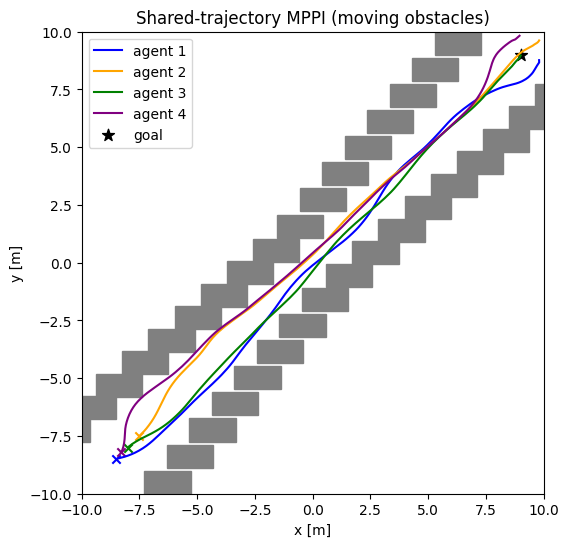

In [3]:

import matplotlib.pyplot as plt
from mppi_MAS_Naive.two_agent_navigation import _make_envs

# recreate envs with the same defaults to render the shared map
envs = _make_envs(num_agents=4, peer_safe_distance=0.8)
shared_map = envs[0]._obstacle_map
goal = envs[0]._goal_pos.cpu().numpy()

colors = ['blue', 'orange', 'green', 'purple']
fig, ax = plt.subplots(figsize=(6, 6))
shared_map.render(ax, zorder=0)
for idx, traj in enumerate(trajectories):
    color = colors[idx % len(colors)]
    ax.plot(traj[:, 0], traj[:, 1], label=f'agent {idx+1}', color=color)
    ax.scatter(envs[idx]._start_pos[0], envs[idx]._start_pos[1], c=color, marker='x')
ax.scatter(goal[0], goal[1], c='black', marker='*', s=80, label='goal')
ax.set_aspect('equal')
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_title('Shared-trajectory MPPI (moving obstacles)')
ax.legend()
plt.show()


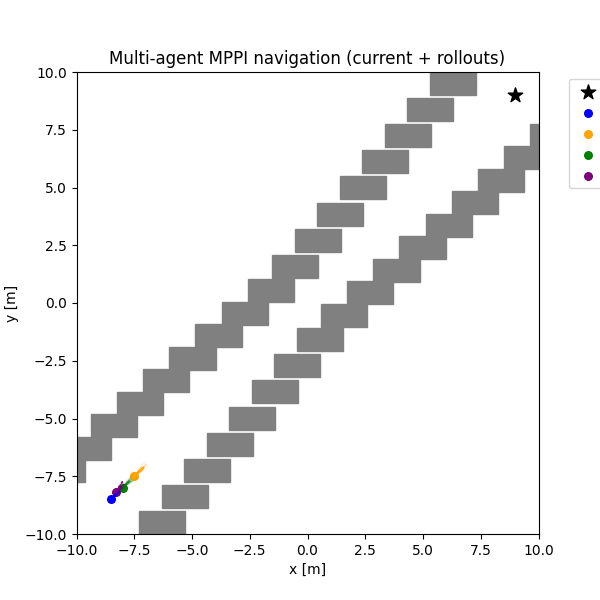

In [4]:

from IPython.display import Image

Image(filename=gif_path)


In [5]:

from IPython.display import FileLink

FileLink(gif_path)


c:\Users\user\OneDrive\학기수업\25-2\스토캐스틱\mppi_MAS\video\multi_agent_moving.gif